<a href="https://colab.research.google.com/github/mugdha711/MLAP-Class/blob/master/German_credit_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Reading files


In [1]:
import pandas as pd
import numpy as np

In [4]:
credit_df = pd.read_csv("/content/German Credit Data.csv")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


####Understand dataset


In [5]:
#count number of good and bad credit
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [6]:
#here 1 is bad credit- our success class but the data should be equally distributed for better model
#we can't do here anything though


###Model Building

In [7]:
#for model building our dependent variable would be status column will be dependent variable

####Feature Extraction

In [9]:
x_features= list(credit_df.columns)
x_features.remove('status')
x_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

####Encoding Categorical Variables

In [10]:
#as we have several categoriacal variable we'll use pd.get_dummies()
encoded_credit_df= pd.get_dummies(credit_df[x_features],drop_first= True)

In [11]:
list(encoded_credit_df)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [12]:
#check for values of checking account and the value A11 is dropped and is considered base category, A11 will have 000
encoded_credit_df[['checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14']].head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


####Defining the dependent and independent variable 

In [13]:
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
y=credit_df.status
x=sm.add_constant(encoded_credit_df)

####Splitting data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


####Logistics Reg Model

In [19]:
import statsmodels.api as sm
logit= sm.Logit(y_train, x_train)
logit_model1=logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [20]:
#logit and fit estimates the parameters and returm model details in logit_model variable

Print Model summary

In [22]:
logit_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2020-08-28 16:34  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

####Model Diagnostics

In [25]:
""""
"To check model validity and goodness of fit, before practical application, we do 3 tests
1. Wald's test(Chi Sq test)- check significance of independt var similar to t-test in MLR(usually <0.05)
2. Likelihood ratio test- check significance of overall model (LLR p value in output)- used for variable(feature) selection also
3. Pseudo R2 - goodness of model"
""""

SyntaxError: ignored

In [29]:
#get significant variables

def get_sig_vars(lm):
  #store p values and corresponding column name in df
  var_p_val_df= pd.DataFrame(lm.pvalues)
  
  var_p_val_df['vars']=var_p_val_df.index
  var_p_val_df.columns=['pvals', 'vars']
  print(var_p_val_df)
  #filter column where pval<0.05
  return list(var_p_val_df[var_p_val_df.pvals <= 0.05]['vars'])



In [30]:
sig_var=get_sig_vars(logit_model1)
sig_var

                              pvals                   vars
const                  8.941041e-01                  const
duration               4.629398e-02               duration
amount                 1.747666e-02                 amount
inst_rate              1.881840e-03              inst_rate
residing_since         2.932187e-01         residing_since
age                    2.689338e-02                    age
num_credits            1.821379e-01            num_credits
checkin_acc_A12        8.434601e-02        checkin_acc_A12
checkin_acc_A13        3.690689e-02        checkin_acc_A13
checkin_acc_A14        5.388728e-10        checkin_acc_A14
credit_history_A31     7.915563e-01     credit_history_A31
credit_history_A32     2.608192e-01     credit_history_A32
credit_history_A33     7.700423e-02     credit_history_A33
credit_history_A34     1.814378e-03     credit_history_A34
savings_acc_A62        8.771991e-01        savings_acc_A62
savings_acc_A63        1.682236e-01        savings_acc_A

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [28]:
logit_model1.pvalues

const                    8.941041e-01
duration                 4.629398e-02
amount                   1.747666e-02
inst_rate                1.881840e-03
residing_since           2.932187e-01
age                      2.689338e-02
num_credits              1.821379e-01
checkin_acc_A12          8.434601e-02
checkin_acc_A13          3.690689e-02
checkin_acc_A14          5.388728e-10
credit_history_A31       7.915563e-01
credit_history_A32       2.608192e-01
credit_history_A33       7.700423e-02
credit_history_A34       1.814378e-03
savings_acc_A62          8.771991e-01
savings_acc_A63          1.682236e-01
savings_acc_A64          6.520330e-02
savings_acc_A65          2.724103e-02
present_emp_since_A72    8.563770e-01
present_emp_since_A73    9.398950e-01
present_emp_since_A74    4.289448e-01
present_emp_since_A75    5.672866e-01
personal_status_A92      9.886719e-01
personal_status_A93      3.528326e-01
personal_status_A94      5.791745e-01
inst_plans_A142          5.638367e-01
inst_plans_A

In [31]:
final_logit= sm.Logit(y_train, sm.add_constant(x_train[sig_var])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [32]:
final_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.1612
Time:                        17:46:50   Log-Likelihood:                -357.94
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 7.419e-26
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8969      0.436     -2.055      0.040      -1.752      -0.042
duration               0.0197      0.010      2.003      0.045       0.000       0.039
amount              9.669e-05   4.17e-05      2.320      0.020     1.5e-05       0.000
inst_rate              0.2811      0.093      3.026      0.002       0.099       0.463
age                   -0.0216      0.009     -2.421      0.015      -0.039      -0.004
checkin_acc_A13       -0.8038      0.408     -1.970      0.049      -1.604      -0.004
checkin_acc_A14       -1.5452      0.219     -7.065      0.000      -1.974      -1.116
credit_history_A34    -0.8781      0.232     -3.786      0.000      -1.333      -0.423
savings_acc_A65       -0.5448      0.258     -2.111      0.035      -1.051      -0.039
======================================================================================
"""

In [33]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2020-08-28 17:47 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

In [34]:
#negative coeff - means prob of bad credit decreases and opposite for +ve

###Predicting on Test Data

In [35]:
y_pred_df=  pd.DataFrame({"actual":y_test,
                          "predicted_prob":final_logit.predict(sm.add_constant(x_test[sig_var]))})

In [36]:
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [37]:
#now let's assume cutoff prob =0.5 then prob >0.5 means 1 and others 0

y_pred_df['predicted']=y_pred_df.predicted_prob.map( lambda x: 1 if x>0.5 else 0)

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


###Creating Confusion Matrix/ Classification Table/ Error Matrix

In [38]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [52]:
from sklearn import metrics
def draw_cm( actual, predicted ):
## Cret
  cm = metrics.confusion_matrix( actual, predicted, [1,0] )
  sn.heatmap(cm, annot=True, fmt='.2f',
             xticklabels = ['Bad_credit', 'Good_Credit'],
             yticklabels = ['Bad_credit', 'Good_Credit'] )
  plt.ylabel("True_label")
  plt.xlabel("Predicted label")
  plt.show()

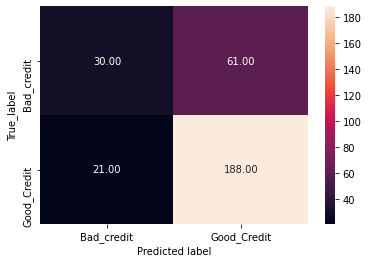

In [53]:
draw_cm( y_pred_df.actual,y_pred_df.predicted )

Metrics

In [56]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



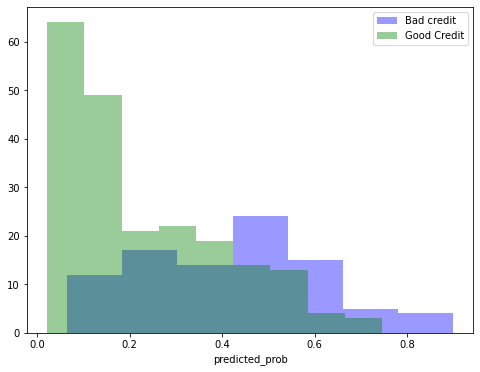

In [71]:
plt.figure( figsize = (8,6) )
# Plotting distribution of predicted probability values for bad credits
sn.distplot( y_pred_df[y_pred_df.actual == 1]['predicted_prob'], kde=False, color = "b", label = 'Bad credit')
# Plotting distribution of predicted probability values for good credits
sn.distplot( y_pred_df[y_pred_df.actual == 0]['predicted_prob'], kde=False, color = "g", label = 'Good Credit')
plt.legend()
plt.show()

###ROC

In [72]:
#to understand overall perf of model and used for model selection
#ROC curve is a plot between sensitivity (true positive rate) on the vertical axis and 1 – specifcity(false positive rate)
#on the horizontal axis



def draw_roc( actual, probs ):
    fpr,     tpr,     thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

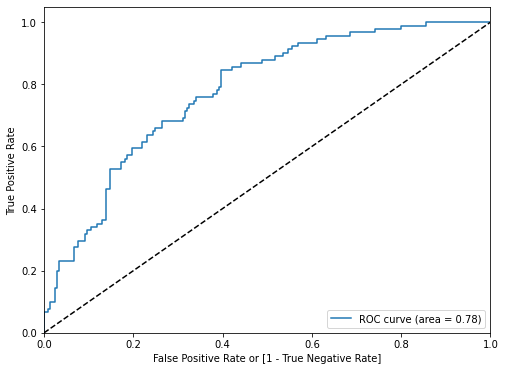

In [73]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [74]:
#Model with higher AUC is preferred and AUC is frequently used for model selection.
#thumb rule, AUC of at least 0.7 is required for practical application of the model. AUC greater than 0.9 
#implies an outstanding model
#Always consider and chcek data imbalance


#AUC can also be calculated through
auc_score = metrics.roc_auc_score( y_pred_df.actual,y_pred_df.predicted_prob )
round( ﬂoat( auc_score ), 2 )

0.78

###Finding Optimal Cutoff

####Youden's index

In [75]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 
                         'fpr': fpr,  
                         'thresholds': thresholds } ) 
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [76]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x > 0.22 else 0)

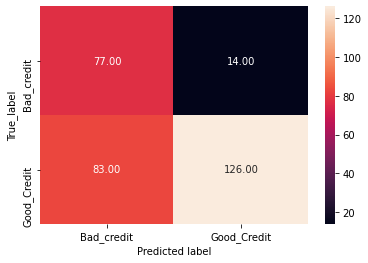

In [77]:
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_new)



In [78]:
print(metrics.classification_report( y_pred_df.actual,
                                    y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



####Cost Based Approach

In [80]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):   
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )   
    cm_mat = np.array( cm ) 
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [81]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [82]:
idx = 0 
## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):    
    cost = get_total_cost( y_pred_df.actual, y_pred_df.predicted_prob.map(  lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )    
    cost_df.loc[idx] = [(each_prob/100), cost]    
    idx += 1

In [83]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


In [84]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map( 
    lambda x: 1 if x > 0.14 else 0)

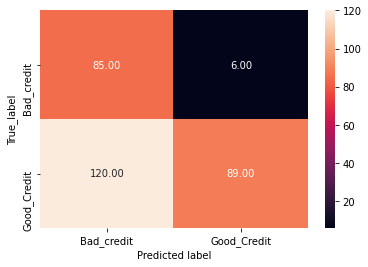

In [85]:
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_using_cost )